In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random 
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder 
from sklearn.linear_model import LinearRegression
%matplotlib inline 

## Load scraped data
<p>Already scraped data and created a list of dictionaries with each product and the target and feature variables. Saved the list into a file using json, and  now opening the list using json. Making sure the list loaded and converting it into a dataframe. </p>

In [2]:
with open('product_list.json', 'r') as f:
    product_dict=json.load(f)


In [3]:
product_dict

[{'product': 'Protini™ Polypeptide Moisturizer',
  'brand': 'Drunk Elephant',
  'review': '4',
  'loves': 294700.0,
  'number of reviews': 4000.0,
  'price': 68.0,
  'size ounces': 1.69,
  'size mL': 50.0,
  'formulation': 'moisturizer',
  'clean at sephora': 'yes',
  'oily': 'yes',
  'dry': 'yes',
  'combination': 'yes',
  'sensitive': 'no',
  'normal': 'yes',
  'vegan': 'yes',
  'cruelty-free': 'yes',
  'gluten-free': 'no',
  'recyclable packaging': 'no'},
 {'product': 'Cicapair™ Tiger Grass Color Correcting Treatment SPF 30',
  'brand': 'Dr. Jart+',
  'review': '4',
  'loves': 147300.0,
  'number of reviews': 3000.0,
  'price': 52.0,
  'size ounces': 1.7,
  'size mL': 50.0,
  'formulation': 'Cream',
  'clean at sephora': 'no',
  'oily': 'yes',
  'dry': 'yes',
  'combination': 'yes',
  'sensitive': 'no',
  'normal': 'yes',
  'vegan': 'no',
  'cruelty-free': 'no',
  'gluten-free': 'no',
  'recyclable packaging': 'no'},
 {'product': 'The Dewy Skin Cream Plumping & Hydrating Moisturizer

In [4]:
product_data = pd.DataFrame(product_dict)  #convert list of dict to df
product_data.set_index('product', inplace=True)
product_data

,brand,review,loves,number of reviews,price,size ounces,size mL,formulation,clean at sephora,oily,dry,combination,sensitive,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,,,,,,,
Protini™ Polypeptide Moisturizer,Drunk Elephant,4,294700.0,4000.0,68.0,1.69,50.0,moisturizer,yes,yes,yes,yes,no,yes,yes,yes,no,no
Cicapair™ Tiger Grass Color Correcting Treatment SPF 30,Dr. Jart+,4,147300.0,3000.0,52.0,1.70,50.0,Cream,no,yes,yes,yes,no,yes,no,no,no,no
The Dewy Skin Cream Plumping & Hydrating Moisturizer,Tatcha,4,152500.0,1000.0,68.0,1.70,50.0,Rich Cream,yes,no,no,no,no,no,no,yes,yes,yes
Cloud Dew Oil-Free Gel Cream Moisturizer,Summer Fridays,5,10300.0,47.0,42.0,1.70,50.0,Lightweight Gel Cream,yes,yes,yes,yes,no,yes,yes,yes,no,yes
The Water Cream Oil-Free Pore Minimizing Moisturizer,Tatcha,4,268300.0,3000.0,68.0,1.70,50.0,moisturizer,yes,yes,no,yes,no,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Argan Daily Moisturizer SPF 47,Josie Maran,4,40800.0,1000.0,34.0,2.00,60.0,moisturizer,yes,yes,yes,yes,no,yes,no,no,no,no
Advanced Time Zone SPF 15- Normal/Combination Skin,Estée Lauder,3.5,1300.0,12.0,82.0,1.70,50.0,Cream,no,no,yes,yes,no,yes,no,no,no,no
ALIVE Prebiotic Balancing Moisturizer SPF 15,Algenist,3.5,1300.0,26.0,40.0,1.70,50.0,Lightweight Lotion,no,yes,yes,yes,no,yes,yes,no,no,no


## EDA and some data cleaning 
<p> Identify any issues in the scraping process. A handful of products did not read the brand appropriately, so those were dropped at this stage. The remaining data cleaning happened after the test-train split. </p>

In [5]:
product_data['brand'].value_counts()

CLINIQUE                  27
Shiseido                  17
Origins                   11
Kiehl's Since 1851        11
Estée Lauder              11
                          ..
SK-II                      1
Smashbox                   1
Shani Darden Skin Care     1
Laura Mercier              1
Dry Combination            1
Name: brand, Length: 111, dtype: int64

In [6]:
product_data.isna().sum()

brand                    0
review                   0
loves                    0
number of reviews        0
price                    0
size ounces             10
size mL                 10
formulation              0
clean at sephora         0
oily                     0
dry                      0
combination              0
sensitive                0
normal                   0
vegan                    0
cruelty-free             0
gluten-free              0
recyclable packaging     0
dtype: int64

In [7]:
product_data['formulation'].value_counts()

Cream                    114
moisturizer               98
Lightweight Cream         45
Rich Cream                30
Lightweight Lotion        28
Lightweight Gel           20
Gel                       15
Lotion                    12
Oil                        6
Heavy Cream                5
Lightweight Oil            4
Lightweight Liquid         2
Lightweight Serum          2
Lightweight lotion         2
Rich Lotion                2
Liquid                     1
Gel-Cream                  1
Lightweight cream          1
Liquid Cream               1
Lightweight Mousse         1
Rich Cream-Gel             1
Rich cream                 1
Lightweight Gel-Cream      1
Light Gel Cream            1
Lightweight gel            1
Serum                      1
Rich Mask                  1
Lightweight Gel Cream      1
                           1
Name: formulation, dtype: int64

In [8]:
product_data['review'].value_counts()

4.5       182
4         143
3.5        48
5          14
No          6
3           4
2.5         1
1 star      1
Name: review, dtype: int64

In [9]:
#product_data[product_data['review']=="1 star"]
#product_data.at[370,'review']=1

In [10]:
product_data[product_data['review']=='No']

,brand,review,loves,number of reviews,price,size ounces,size mL,formulation,clean at sephora,oily,dry,combination,sensitive,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,,,,,,,
That Big Screen Moisturizer with Broad Spectrum SPF 30,JLo Beauty,No,922.0,0.0,54.0,1.7,50.0,Lightweight Cream,no,yes,yes,yes,no,yes,no,yes,no,no
Rénergie Lift Multi-Action Lifting & Firming Duo,Lancôme,No,1600.0,0.0,170.0,NaN,NaN,Lightweight Cream,no,yes,yes,yes,no,yes,no,no,no,no
Charlotte's Magic Cream,Lunar New Year Edition,No,260.0,0.0,100.0,1.7,50.0,Cream,no,no,yes,yes,no,yes,no,yes,yes,no
Oil Control Daily Moisturizer,Lab Series For Men,No,347.0,0.0,36.0,1.7,50.0,Lotion,no,yes,no,yes,no,no,no,no,no,no
SKINPOWER Cream,SK-II,No,27.0,0.0,235.0,2.7,80.0,Cream,no,no,yes,no,no,yes,no,no,no,no
Capture Totale Super Potent Rich Cream,Dior,No,13.0,0.0,110.0,1.7,50.0,Cream,no,no,no,no,no,no,no,no,no,no


In [11]:
product_data['review'].value_counts()

4.5       182
4         143
3.5        48
5          14
No          6
3           4
2.5         1
1 star      1
Name: review, dtype: int64

In [12]:
product_data['size ounces'].value_counts()

1.70      186
1.69       35
2.00       28
1.60       24
1.00       23
0.50       10
1.50        7
4.20        7
2.50        6
1.35        5
1.30        4
3.40        4
4.22        3
3.00        3
1.68        3
1.40        3
1.80        3
1.01        2
1.61        2
5.00        2
2.02        2
5.10        2
1.94        1
0.53        1
6.08        1
4.70        1
2.70        1
2.20        1
400.00      1
0.35        1
16.90       1
50.00       1
200.00      1
1.90        1
3.30        1
0.84        1
0.95        1
2.53        1
0.48        1
1.18        1
1.02        1
5.41        1
6.70        1
2.60        1
2.10        1
3.38        1
5.70        1
Name: size ounces, dtype: int64

In [13]:
product_data['size mL'].value_counts()

50.00     248
60.00      27
30.00      26
40.00      11
125.00     10
15.00      10
75.00       7
100.00      6
48.00       4
150.00      4
45.00       4
59.00       4
28.00       2
89.00       2
80.00       2
13.50       2
55.00       1
141.00      1
35.00       1
6.76        1
46.00       1
14.70       1
65.00       1
47.00       1
170.00      1
90.00       1
160.00      1
42.00       1
74.00       1
44.00       1
200.00      1
500.00      1
10.00       1
47.59       1
1.69        1
25.00       1
Name: size mL, dtype: int64

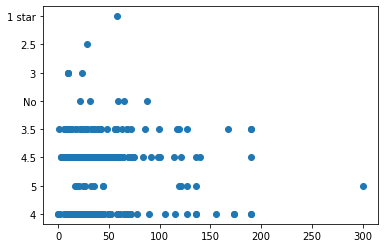

In [14]:
plt.scatter(product_data['price']/product_data['size ounces'],product_data['review'])

In [15]:
product_data['brand'].sort_values().tolist()

['AMOREPACIFIC',
 'AMOREPACIFIC',
 'AMOREPACIFIC',
 'AMOREPACIFIC',
 'Algenist',
 'Algenist',
 'Algenist',
 'Algenist',
 'Algenist',
 'Algenist',
 'Algenist',
 'All Skin Types',
 'All Skin Types',
 'Alpha-H',
 'Alpha-H',
 'BeautyBio',
 'BeautyBio',
 'BeautyBio',
 'Biossance',
 'Biossance',
 'Biossance',
 'Biossance',
 'Bobbi Brown',
 'Bobbi Brown',
 'Bobbi Brown',
 'Bobbi Brown',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE',
 'CLINIQUE |',
 'COOLA',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Caudalie',
 'Charlotte Tilbury',
 'Charlotte Tilbury',
 'Charlotte Tilbury',
 'Charlotte Tilbury',
 'Charlotte Tilbury',
 'Clarins',
 '

In [16]:
product_data.loc[product_data['brand']=='CLINIQUE |','brand']='CLINIQUE'

In [17]:
product_data.loc[product_data['brand']=='CLINIQUE |']

,brand,review,loves,number of reviews,price,size ounces,size mL,formulation,clean at sephora,oily,dry,combination,sensitive,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,,,,,,,


In [18]:
i=product_data[product_data['brand']=='Dry Combination'].index

In [19]:
product_data.drop(i, inplace=True)

In [20]:
j=product_data[product_data['brand']=='For Combination Skin'].index

In [21]:
product_data.drop(j, inplace=True)

In [22]:
k=product_data[product_data['brand']=='For Dry Skin'].index

In [23]:
product_data.drop(k, inplace=True)

In [24]:
n=product_data[product_data['brand']=='For Dry Skin'].index

In [25]:
product_data.drop(n, inplace=True)

In [26]:
v=product_data[product_data['brand']=='For Oily & Acne-Prone Skin'].index

In [27]:
product_data.drop(v, inplace=True)

In [28]:
w=product_data[product_data['brand']=='Normal to Combination Skin'].index
w

Index(['Multi-Active Day Cream-Gel', 'Hydra-Essentiel Cooling Gel'], dtype='object', name='product')

In [29]:
product_data.drop(w, inplace=True)

In [30]:
x=product_data[product_data['brand']=='Normal to Dry Skin'].index


In [31]:
product_data.drop(x, inplace=True)

In [32]:
y=product_data[product_data['brand']=='Very Dry Skin'].index

In [33]:
product_data.drop(y, inplace=True)

In [34]:
z=product_data[product_data['brand']=='Very Dry to Dry'].index

In [35]:
product_data.drop(z, inplace=True)

In [36]:
product_data 

,brand,review,loves,number of reviews,price,size ounces,size mL,formulation,clean at sephora,oily,dry,combination,sensitive,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,,,,,,,
Protini™ Polypeptide Moisturizer,Drunk Elephant,4,294700.0,4000.0,68.0,1.69,50.0,moisturizer,yes,yes,yes,yes,no,yes,yes,yes,no,no
Cicapair™ Tiger Grass Color Correcting Treatment SPF 30,Dr. Jart+,4,147300.0,3000.0,52.0,1.70,50.0,Cream,no,yes,yes,yes,no,yes,no,no,no,no
The Dewy Skin Cream Plumping & Hydrating Moisturizer,Tatcha,4,152500.0,1000.0,68.0,1.70,50.0,Rich Cream,yes,no,no,no,no,no,no,yes,yes,yes
Cloud Dew Oil-Free Gel Cream Moisturizer,Summer Fridays,5,10300.0,47.0,42.0,1.70,50.0,Lightweight Gel Cream,yes,yes,yes,yes,no,yes,yes,yes,no,yes
The Water Cream Oil-Free Pore Minimizing Moisturizer,Tatcha,4,268300.0,3000.0,68.0,1.70,50.0,moisturizer,yes,yes,no,yes,no,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Argan Daily Moisturizer SPF 47,Josie Maran,4,40800.0,1000.0,34.0,2.00,60.0,moisturizer,yes,yes,yes,yes,no,yes,no,no,no,no
Advanced Time Zone SPF 15- Normal/Combination Skin,Estée Lauder,3.5,1300.0,12.0,82.0,1.70,50.0,Cream,no,no,yes,yes,no,yes,no,no,no,no
ALIVE Prebiotic Balancing Moisturizer SPF 15,Algenist,3.5,1300.0,26.0,40.0,1.70,50.0,Lightweight Lotion,no,yes,yes,yes,no,yes,yes,no,no,no


## Split into Testing and Training Data 

In [37]:
X, y = product_data.drop(['review','number of reviews','loves'],axis=1), product_data['review']


In [38]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_

,brand,price,size ounces,size mL,formulation,clean at sephora,oily,dry,combination,sensitive,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,,,,
Maracuja Oil,tarte,48.0,1.70,50.0,Oil,yes,yes,yes,yes,no,yes,no,no,no,no
Superfood Air-Whip Moisturizer with Hyaluronic Acid,Youth To The People,48.0,2.00,60.0,Lightweight Cream,yes,no,yes,no,no,yes,yes,yes,yes,yes
Super Matte Moisturizer,SEPHORA COLLECTION,17.0,1.69,50.0,Lightweight lotion,yes,no,no,no,no,no,yes,no,no,yes
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,Lancôme,102.0,1.69,50.0,Cream,no,no,yes,no,no,no,no,no,no,no
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,Estée Lauder,98.0,1.70,50.0,Cream,no,yes,yes,yes,no,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinosource Moisturizing Sorbet,Caudalie,39.0,1.30,40.0,Lightweight Gel,yes,no,yes,no,no,yes,yes,no,no,no
Face Cream,Dr. Barbara Sturm,215.0,1.69,50.0,Cream,yes,yes,yes,yes,no,yes,yes,yes,yes,no
TIME RESPONSE Skin Reserve Crème,AMOREPACIFIC,150.0,0.50,15.0,Rich Cream,no,yes,yes,yes,no,yes,no,yes,no,no


## Clean the features and target training data
<p> Make sure all formuation are lower case. Empty formulations labeled as moisturizers. One Hot Encode all the categorical variables. Fill in the None for size ounces with size mean. Drop any products that have zero reviews. Ensure that all ratings are in integer format with not strings. </p>

In [39]:
X_.loc[:,'formulation'] = X_['formulation'].str.lower()

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [40]:
X_['formulation'].value_counts()

cream                 80
moisturizer           65
lightweight cream     32
rich cream            22
lightweight lotion    18
lightweight gel       17
gel                   13
lotion                 9
oil                    4
heavy cream            3
lightweight oil        2
rich mask              1
serum                  1
gel-cream              1
lightweight liquid     1
rich cream-gel         1
liquid cream           1
lightweight serum      1
                       1
Name: formulation, dtype: int64

In [41]:
X_.loc[X_['formulation']=='','formulation']='moisturizer'
X_['formulation'].value_counts()

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


cream                 80
moisturizer           66
lightweight cream     32
rich cream            22
lightweight lotion    18
lightweight gel       17
gel                   13
lotion                 9
oil                    4
heavy cream            3
lightweight oil        2
lightweight liquid     1
gel-cream              1
rich cream-gel         1
rich mask              1
liquid cream           1
lightweight serum      1
serum                  1
Name: formulation, dtype: int64

In [42]:
cat_X =X_.loc[:,['brand','formulation','clean at sephora','oily','dry','sensitive','combination','normal','vegan', 'cruelty-free','gluten-free','recyclable packaging']]
cat_X

,brand,formulation,clean at sephora,oily,dry,sensitive,combination,normal,vegan,cruelty-free,gluten-free,recyclable packaging
product,,,,,,,,,,,,
Maracuja Oil,tarte,oil,yes,yes,yes,no,yes,yes,no,no,no,no
Superfood Air-Whip Moisturizer with Hyaluronic Acid,Youth To The People,lightweight cream,yes,no,yes,no,no,yes,yes,yes,yes,yes
Super Matte Moisturizer,SEPHORA COLLECTION,lightweight lotion,yes,no,no,no,no,no,yes,no,no,yes
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,Lancôme,cream,no,no,yes,no,no,no,no,no,no,no
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,Estée Lauder,cream,no,yes,yes,no,yes,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
Vinosource Moisturizing Sorbet,Caudalie,lightweight gel,yes,no,yes,no,no,yes,yes,no,no,no
Face Cream,Dr. Barbara Sturm,cream,yes,yes,yes,no,yes,yes,yes,yes,yes,no
TIME RESPONSE Skin Reserve Crème,AMOREPACIFIC,rich cream,no,yes,yes,no,yes,yes,no,yes,no,no


In [43]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_X)

ohe_X = ohe.transform(cat_X)

columns = ohe.get_feature_names(['brand','formulation','clean at sephora','oily','dry','sensitive','combination','normal','vegan', 'cruelty-free','gluten-free','recyclable packaging'])

ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

ohe_X_df

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_COOLA,brand_Caudalie,brand_Charlotte Tilbury,...,formulation_serum,clean at sephora_yes,oily_yes,dry_yes,combination_yes,normal_yes,vegan_yes,cruelty-free_yes,gluten-free_yes,recyclable packaging_yes
product,,,,,,,,,,,,,,,,,,,,,
Maracuja Oil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Superfood Air-Whip Moisturizer with Hyaluronic Acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Super Matte Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinosource Moisturizing Sorbet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
Face Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
TIME RESPONSE Skin Reserve Crème,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [44]:
combined_df = pd.concat([ohe_X_df, X_[['price','size ounces']]], axis=1)
combined_df

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_COOLA,brand_Caudalie,brand_Charlotte Tilbury,...,oily_yes,dry_yes,combination_yes,normal_yes,vegan_yes,cruelty-free_yes,gluten-free_yes,recyclable packaging_yes,price,size ounces
product,,,,,,,,,,,,,,,,,,,,,
Maracuja Oil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,48.0,1.70
Superfood Air-Whip Moisturizer with Hyaluronic Acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,48.0,2.00
Super Matte Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17.0,1.69
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,1.69
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,98.0,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinosource Moisturizing Sorbet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,39.0,1.30
Face Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,215.0,1.69
TIME RESPONSE Skin Reserve Crème,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,150.0,0.50


In [45]:
combined_df.isna().sum()

brand_Algenist              0
brand_All Skin Types        0
brand_Alpha-H               0
brand_BeautyBio             0
brand_Biossance             0
                           ..
cruelty-free_yes            0
gluten-free_yes             0
recyclable packaging_yes    0
price                       0
size ounces                 7
Length: 116, dtype: int64

In [46]:
values={'size ounces': combined_df['size ounces'].mean()}
combined_df.fillna(value=values, inplace=True)

In [47]:
combined_df['size ounces'].mean()

2.758947368421061

In [48]:
combined_df.isna().sum()

brand_Algenist              0
brand_All Skin Types        0
brand_Alpha-H               0
brand_BeautyBio             0
brand_Biossance             0
                           ..
cruelty-free_yes            0
gluten-free_yes             0
recyclable packaging_yes    0
price                       0
size ounces                 0
Length: 116, dtype: int64

In [49]:
#y_[y_=='No']=None
#y_[['Oil Control Daily Moisturizer',"Charlotte's Magic Cream",'SKINPOWER Cream','Capture Totale Super Potent Rich Cream']]=None
#y_.isna().sum()
combined_df.drop(y_[y_=='No'].index.tolist(), inplace=True)
y_[y_=='No'].index.tolist()


['SKINPOWER Cream',
 'Oil Control Daily Moisturizer',
 'Capture Totale Super Potent Rich Cream',
 "Charlotte's Magic Cream"]

In [50]:
y_[y_=="No"]=None
y_.dropna(inplace=True)

In [51]:
y_[y_=='1 star']=1
#y_['Mini Lightweight Magic Cream Moisturizer SPF20']=1
y_[y_=='1 star']

Series([], Name: review, dtype: object)

In [52]:
#combined_df.drop(['Oil Control Daily Moisturizer',"Charlotte's Magic Cream",'SKINPOWER Cream','Capture Totale Super Potent Rich Cream'],inplace=True)
y_.isna().sum()
combined_df

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_COOLA,brand_Caudalie,brand_Charlotte Tilbury,...,oily_yes,dry_yes,combination_yes,normal_yes,vegan_yes,cruelty-free_yes,gluten-free_yes,recyclable packaging_yes,price,size ounces
product,,,,,,,,,,,,,,,,,,,,,
Maracuja Oil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,48.0,1.70
Superfood Air-Whip Moisturizer with Hyaluronic Acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,48.0,2.00
Super Matte Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17.0,1.69
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,1.69
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,98.0,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinosource Moisturizing Sorbet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,39.0,1.30
Face Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,215.0,1.69
TIME RESPONSE Skin Reserve Crème,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,150.0,0.50


In [54]:
y_.shape

(269,)

In [55]:
combined_df.shape

(269, 116)

In [56]:

                     
                     
                     #'brand_CLINIQUE','brand_The INKEY List','brand_Tatcha','brand_Supergoop!','brand_belif','brand_Drunk Elephant',
                      #"brand_Kiehl's Since 1851",'size ounces','clean at sephora_yes','oily_yes','dry_yes','combination_yes','normal_yes','cruelty-free_yes','gluten-free_yes']]


In [57]:
y_test.value_counts()

4.5       50
4         40
3.5       19
5          3
3          2
No         2
1 star     1
Name: review, dtype: int64

## Clean Test Data 
<p> Created a function to clean test data in exactly the same way that I cleaned the train data. </p>

In [58]:
def clean_data(X_, y_):

    X_.loc[:,'formulation'] = X_['formulation'].str.lower()
    
    X_.loc[X_['formulation']=='','formulation']='moisturizer'
    
    cat_X =X_.loc[:,['brand','formulation','clean at sephora','oily','dry','sensitive','combination','normal','vegan', 'cruelty-free','gluten-free','recyclable packaging']]

    ohe = OneHotEncoder(drop='first', sparse=False)

    ohe.fit(cat_X)

    ohe_X = ohe.transform(cat_X)

    columns = ohe.get_feature_names(['brand','formulation','clean at sephora','oily','dry','sensitive','combination','normal','vegan', 'cruelty-free','gluten-free','recyclable packaging'])

    ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

    combined_df = pd.concat([ohe_X_df, X_[['price','size ounces']]], axis=1)

    values={'size ounces': combined_df['size ounces'].mean()}

    combined_df.fillna(value=values, inplace=True)

    combined_df.drop(y_[y_=='No'].index.tolist(), inplace=True)
    
    print(combined_df.shape)

    y_[y_=='No']=None
    
    y_[y_=='1 star']=1
    
    y_.dropna(inplace=True)

   
    return combined_df, y_



In [59]:
combined_X_test, y_test_clean = clean_data(X_test,y_test)
combined_X_test.shape
#y_test.shape

(115, 92)


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


(115, 92)

In [60]:
combined_X_test.shape

(115, 92)

## Make sure test and train have the same number of columns and add missing columns to both 

In [61]:
for i in combined_df:
    if i not in combined_X_test.columns: combined_X_test[i] = 0
            

In [62]:
combined_X_test.shape

(115, 135)

In [63]:
for i in combined_X_test:
    if i not in combined_df.columns: combined_df[i] = 0
           

## Added price per ounce variable to test and to train 

In [64]:
combined_df['price per ounce']=combined_df['price']/combined_df['size ounces']
combined_df.head()

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_COOLA,brand_Caudalie,brand_Charlotte Tilbury,...,brand_Wishful,brand_Yves Saint Laurent,brand_lilah b.,formulation_light gel cream,formulation_lightweight gel cream,formulation_lightweight gel-cream,formulation_lightweight mousse,formulation_liquid,formulation_rich lotion,price per ounce
product,,,,,,,,,,,,,,,,,,,,,
Maracuja Oil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,28.235294
Superfood Air-Whip Moisturizer with Hyaluronic Acid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,24.000000
Super Matte Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,10.059172
Rènergie Lift Multi-Action Rich Cream with SPF 15 For Dry Skin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,60.355030
Resilience Multi-Effect Night Tri-Peptide Face and Neck Creme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,57.647059


In [65]:
combined_X_test['price per ounce']=combined_X_test['price']/combined_X_test['size ounces']

In [66]:
combined_df['price per ounce squared'] = combined_df['price per ounce']**2

In [67]:
combined_X_test['price per ounce squared']=combined_X_test['price per ounce']**2

## All the linear regressions

In [68]:
lnr=LinearRegression()

In [98]:
lnr.fit(combined_df[['price per ounce']], y_)

LinearRegression()

In [100]:
lnr.score(combined_df[['price per ounce']], y_)

0.0032580010272570403

In [101]:
lnr.score(combined_X_test[['price per ounce']], y_test_clean)

-0.04187659149267553

In [102]:
lnr.fit(combined_df[['brand_COOLA']], y_)

LinearRegression()

In [103]:
lnr.score(combined_df[['brand_COOLA']], y_)

0.0700796377584848

In [104]:
lnr.score(combined_X_test[['brand_COOLA']], y_test_clean)

-0.03801492122666161

In [69]:
lnr.fit(combined_df.drop(['price per ounce','price per ounce squared'], axis=1), y_) #basic linear model

LinearRegression()

In [70]:
lnr.score(combined_df.drop(['price per ounce','price per ounce squared'],axis=1), y_)

0.5735641036644561

In [71]:
lnr.score(combined_X_test.drop(['price per ounce','price per ounce squared'],axis=1), y_test_clean) #overfit

-4.95462008938713e+21

In [72]:
lnr.fit(combined_df.drop(['price','size ounces','price per ounce squared'], axis=1), y_) #take out prize and size ounces, add price per ounce

LinearRegression()

In [73]:
lnr.score(combined_df.drop(['price','size ounces','price per ounce squared'],axis=1), y_)

0.5703230282859229

In [74]:
lnr.score(combined_X_test.drop(['price','size ounces','price per ounce squared'],axis=1), y_test_clean)

-4.103726528235869e+21

In [75]:
lnr.fit(combined_df.drop(['price','size ounces'], axis=1), y_) #take out prize and size ounces, add price per ounce and price per ounce squared

LinearRegression()

In [76]:
lnr.score(combined_df.drop(['price','size ounces'],axis=1), y_)

0.5714259497306694

In [77]:
lnr.score(combined_X_test.drop(['price','size ounces'],axis=1), y_test_clean)

-5634715737127542.0

In [78]:
combined_df_2=combined_df.drop(['price','size ounces','price per ounce squared'],axis=1)

In [79]:
combined_X_test_2=combined_X_test.drop(['price','size ounces','price per ounce squared'],axis=1)

## Ran LASSO-CV and Ridge-CV and Residual Analysis 

In [80]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [81]:
m = LassoCV()

In [82]:
#X_train_scaled.shape 

In [83]:
s = StandardScaler(with_mean=False)
X_train_scaled = s.fit_transform(combined_df_2)
m.fit(X_train_scaled, y_)
m.score(X_train_scaled, y_)

0.3422400445361331

In [84]:
m.score(s.transform(combined_X_test_2),y_test_clean)

-0.5411214777081104

In [85]:
m.coef_

array([ 0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.00329295, -0.07329994, -0.08949728,  0.00052305, -0.05399444,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.02225188,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.0220108 , -0.        , -0.        , -0.        ,
       -0.00618955,  0.        ,  0.        ,  0.00450731, -0.        ,
       -0.01936406,  0.        ,  0.00292822,  0.        ,  0.02101225,
        0.        ,  0.        ,  0.        , -0.        ,  0.00025083,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.00277914, -0.        , -0.01365977, -0.00341302,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.  

In [86]:
list(zip(combined_df_2.columns,m.coef_))

[('brand_Algenist', 0.0),
 ('brand_All Skin Types', -0.0),
 ('brand_Alpha-H', 0.0),
 ('brand_BeautyBio', 0.0),
 ('brand_Biossance', 0.0),
 ('brand_Bobbi Brown', 0.0032929462326851426),
 ('brand_CLINIQUE', -0.07329994071967195),
 ('brand_COOLA', -0.08949727778582241),
 ('brand_Caudalie', 0.0005230452127012469),
 ('brand_Charlotte Tilbury', -0.053994439384665985),
 ('brand_Clarins', -0.0),
 ('brand_Dermalogica', 0.0),
 ('brand_Dior', 0.0),
 ('brand_Dr. Barbara Sturm', 0.0),
 ('brand_Dr. Brandt Skincare', -0.0),
 ('brand_Dr. Dennis Gross Skincare', 0.0),
 ('brand_Dr. Jart+', 0.0),
 ('brand_Dr. Zenovia Skincare', 0.0),
 ('brand_Drunk Elephant', 0.0),
 ('brand_Erborian', -0.022251876462581616),
 ('brand_Estée Lauder', -0.0),
 ('brand_Eve Lom', -0.0),
 ('brand_FENTY SKIN', 0.0),
 ('brand_Farmacy', -0.0),
 ('brand_First Aid Beauty', -0.0),
 ('brand_GLAMGLOW', 0.0),
 ('brand_Glow Recipe', 0.0),
 ('brand_Herbivore', 0.0),
 ('brand_Hydrate & Glow', -0.0),
 ('brand_IT Cosmetics', -0.0),
 ('brand_

In [87]:
m_2=RidgeCV()
m_2.fit(X_train_scaled, y_)
m_2.score(X_train_scaled, y_)

0.5568004969400934

In [88]:
m_2.score(s.transform(combined_X_test_2),y_test_clean)

-1.0548523443574398

In [89]:
list(zip(combined_df_2.columns,m_2.coef_))

[('brand_Algenist', 0.012088480049567224),
 ('brand_All Skin Types', -0.012376778218033513),
 ('brand_Alpha-H', 0.0065381015368280206),
 ('brand_BeautyBio', 0.011101995789755771),
 ('brand_Biossance', -0.01760473248282013),
 ('brand_Bobbi Brown', 0.02751040271294783),
 ('brand_CLINIQUE', -0.09292304843298033),
 ('brand_COOLA', -0.12355729147673811),
 ('brand_Caudalie', 0.02163690931798163),
 ('brand_Charlotte Tilbury', -0.06603849919121785),
 ('brand_Clarins', -0.026493092845170853),
 ('brand_Dermalogica', 0.023511148538643833),
 ('brand_Dior', 0.0),
 ('brand_Dr. Barbara Sturm', -0.007099516447602761),
 ('brand_Dr. Brandt Skincare', -0.00827803535186783),
 ('brand_Dr. Dennis Gross Skincare', 0.007249127387878557),
 ('brand_Dr. Jart+', 0.004648722894364618),
 ('brand_Dr. Zenovia Skincare', -0.0002926816430311105),
 ('brand_Drunk Elephant', -0.010276742286605557),
 ('brand_Erborian', -0.03903612025939421),
 ('brand_Estée Lauder', -0.01888888861791596),
 ('brand_Eve Lom', -0.0027812249418

In [90]:
y_test_array = np.asarray(y_test_clean, dtype = np.float64,  
                        order ='C') 

In [91]:
combined_X_test_2['res']=m.predict(combined_X_test_2)-y_test_array

In [92]:
combined_X_test_2.sort_values(['res']).head(15)

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_Caudalie,brand_Charlotte Tilbury,brand_Dermalogica,...,brand_alpyn beauty,brand_boscia,brand_goop,formulation_gel-cream,formulation_liquid cream,formulation_rich cream-gel,formulation_rich mask,formulation_serum,price per ounce,res
product,,,,,,,,,,,,,,,,,,,,,
Brightening Face Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,136.094675,-0.686694
Pure Shots Perfect Plumper Face Cream Refill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,43.750000,-0.685386
Cloud Dew Oil-Free Gel Cream Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,24.705882,-0.664836
Dramatically Different Moisturizing Cream,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,17.352941,-0.280545
Smart Broad Spectrum SPF 15 Custom-Repair Moisturizer for Very Dry to Dry Skin,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,32.941176,-0.280545
Moisture Surge 72-Hour Auto-Replenishing Hydrator,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,23.235294,-0.268273
Resveratrol Lift Firming Night Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,43.125000,-0.254333
Dynamic Skin Recovery SPF50 Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,44.117647,-0.251924
Teatreement™ Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,18.934911,-0.231051


In [93]:
combined_X_test_2.sort_values(['res']).tail(20)

,brand_Algenist,brand_All Skin Types,brand_Alpha-H,brand_BeautyBio,brand_Biossance,brand_Bobbi Brown,brand_CLINIQUE,brand_Caudalie,brand_Charlotte Tilbury,brand_Dermalogica,...,brand_alpyn beauty,brand_boscia,brand_goop,formulation_gel-cream,formulation_liquid cream,formulation_rich cream-gel,formulation_rich mask,formulation_serum,price per ounce,res
product,,,,,,,,,,,,,,,,,,,,,
Bird's Nest Blurring Beauty Mousse CC Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,36.000000,0.773391
Firming Day Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,10.059172,0.781738
Facial Fuel Sunscreen Broad Spectrum SPF 20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,8.333333,0.782573
Aqua Reotier Ultra Thirst-Quenching Cream Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,17.647059,0.783016
The Moisturizing Cool Gel Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,190.000000,0.792755
Resilience Multi-Effect Tri-Peptide Face and Neck Crème,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,55.882353,0.792755
White Lucent Overnight Cream & Mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,40.384615,0.801614
Hyaluronic Dew Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,17.333333,0.802071
Potent-C™ Vitamin C Bright & Plump Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,40.000000,0.805027


In [94]:
combined_df.columns.tolist()

['brand_Algenist',
 'brand_All Skin Types',
 'brand_Alpha-H',
 'brand_BeautyBio',
 'brand_Biossance',
 'brand_Bobbi Brown',
 'brand_CLINIQUE',
 'brand_COOLA',
 'brand_Caudalie',
 'brand_Charlotte Tilbury',
 'brand_Clarins',
 'brand_Dermalogica',
 'brand_Dior',
 'brand_Dr. Barbara Sturm',
 'brand_Dr. Brandt Skincare',
 'brand_Dr. Dennis Gross Skincare',
 'brand_Dr. Jart+',
 'brand_Dr. Zenovia Skincare',
 'brand_Drunk Elephant',
 'brand_Erborian',
 'brand_Estée Lauder',
 'brand_Eve Lom',
 'brand_FENTY SKIN',
 'brand_Farmacy',
 'brand_First Aid Beauty',
 'brand_GLAMGLOW',
 'brand_Glow Recipe',
 'brand_Herbivore',
 'brand_Hydrate & Glow',
 'brand_IT Cosmetics',
 'brand_JLo Beauty',
 'brand_Josie Maran',
 'brand_KORA Organics',
 'brand_KORRES',
 'brand_Kate Somerville',
 "brand_Kiehl's Since 1851",
 'brand_Kopari',
 "brand_L'Occitane",
 'brand_LANEIGE',
 'brand_LXMI',
 'brand_La Mer',
 'brand_Lab Series For Men',
 'brand_Lancôme',
 'brand_Laura Mercier',
 'brand_Lord Jones',
 'brand_Lunar N

In [95]:
combined_X_test_2.columns.tolist()

['brand_Algenist',
 'brand_All Skin Types',
 'brand_Alpha-H',
 'brand_BeautyBio',
 'brand_Biossance',
 'brand_Bobbi Brown',
 'brand_CLINIQUE',
 'brand_Caudalie',
 'brand_Charlotte Tilbury',
 'brand_Dermalogica',
 'brand_Dior',
 'brand_Dr. Barbara Sturm',
 'brand_Dr. Brandt Skincare',
 'brand_Dr. Jart+',
 'brand_Dr. Zenovia Skincare',
 'brand_Drunk Elephant',
 'brand_Estée Lauder',
 'brand_FENTY SKIN',
 'brand_Farmacy',
 'brand_Firm + Illuminate',
 'brand_First Aid Beauty',
 'brand_GLAMGLOW',
 'brand_Guerlain',
 'brand_Herbivore',
 'brand_INC.redible',
 'brand_IT Cosmetics',
 'brand_JLo Beauty',
 'brand_Jack Black',
 'brand_Josie Maran',
 'brand_KORRES',
 "brand_Kiehl's Since 1851",
 "brand_L'Occitane",
 'brand_La Mer',
 'brand_Lancôme',
 'brand_Mario Badescu',
 'brand_Murad',
 'brand_OLEHENRIKSEN',
 'brand_Origins',
 'brand_Perricone MD',
 'brand_Peter Thomas Roth',
 'brand_Pretty Vulgar',
 'brand_Prima',
 'brand_Proactiv',
 'brand_REN Clean Skincare',
 'brand_SEPHORA COLLECTION',
 'br

## Charts for Presentation 

In [113]:
y_total=pd.concat([y_,y_test_clean])
type(y_total)



pandas.core.series.Series

In [114]:
y_total_array = np.asarray(y_total, dtype = np.float64,  
                        order ='C') 

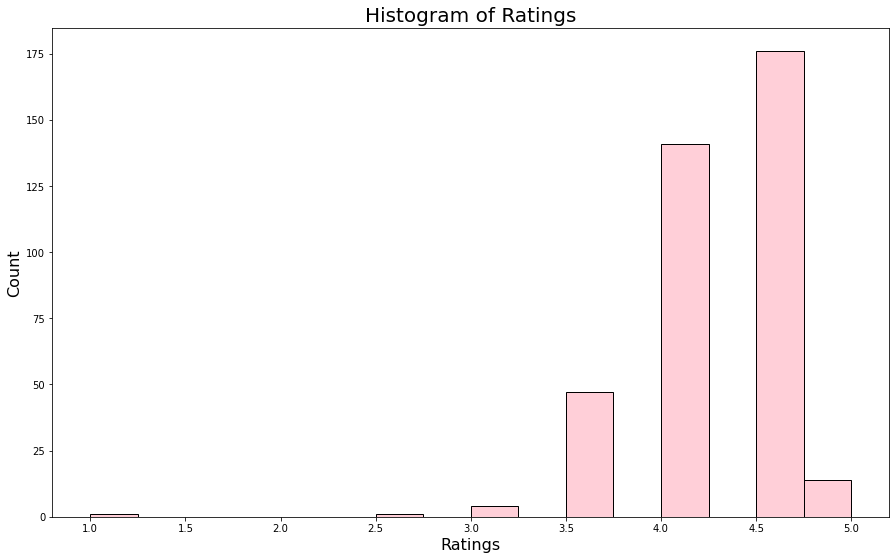

In [140]:
plt.figure(figsize=(15,9))
plt.title("Histogram of Ratings", size=20)
sns_fig=sns.histplot(y_total_array, color = 'pink', binwidth=.25)
plt.xlabel("Ratings", size=16)
plt.ylabel('Count', size=16);
plt.savefig('hist_1.png')

In [141]:
y_total_array.mean()

4.182291666666667